In [1]:
import numpy as np
import pandas as pd
import matplotlib
# %matplotlib notebook
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
linmod = LinearRegression()

In [2]:
datafile = '../../dataset/ch09/scottish_hill_races.txt'
scottish_hill_races = pd.read_csv(datafile, sep='\t')

In [3]:
scottish_hill_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Race               94 non-null     object 
 1   Distance(km)       94 non-null     float64
 2   Climb (m)          94 non-null     int64  
 3   Mens Time (min)    90 non-null     float64
 4   Womens Time (min)  90 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.8+ KB


In [4]:
len(scottish_hill_races)

94

In [5]:
scottish_hill_races.columns

Index(['Race', 'Distance(km)', 'Climb (m)', 'Mens Time (min)',
       'Womens Time (min)'],
      dtype='object')

In [6]:
scottish_hill_races.head()

,Race,Distance(km),Climb (m),Mens Time (min),Womens Time (min)
0,Alva Games Hill Race,2.5,385,18.650000,25.816667
1,Aonach Mor Uphill Race,4.0,610,22.250000,26.466667
2,Arrochar Alps,25.0,2400,187.650000,249.433330
3,Beinn Lora Hill Race,5.0,340,26.800000,32.833333
4,Ben Aigan Hill Race,6.4,326,28.466667,34.416667


In [7]:
scottish_hill_races

,Race,Distance(km),Climb (m),Mens Time (min),Womens Time (min)
0,Alva Games Hill Race,2.5,385,18.650000,25.816667
1,Aonach Mor Uphill Race,4.0,610,22.250000,26.466667
2,Arrochar Alps,25.0,2400,187.650000,249.433330
3,Beinn Lora Hill Race,5.0,340,26.800000,32.833333
4,Ben Aigan Hill Race,6.4,326,28.466667,34.416667
...,...,...,...,...,...
89,Turnhouse Hill Race,5.0,350,25.583334,30.683333
90,Two Breweries Hill Race,29.0,1500,153.950000,173.933330
91,Whangie Whizz Hill Race,6.8,240,26.533333,30.733334
92,White Tops Hill Race,10.0,270,31.683334,36.566667


In [8]:
scottish_hill_races.dropna(axis='index')

,Race,Distance(km),Climb (m),Mens Time (min),Womens Time (min)
0,Alva Games Hill Race,2.5,385,18.650000,25.816667
1,Aonach Mor Uphill Race,4.0,610,22.250000,26.466667
2,Arrochar Alps,25.0,2400,187.650000,249.433330
3,Beinn Lora Hill Race,5.0,340,26.800000,32.833333
4,Ben Aigan Hill Race,6.4,326,28.466667,34.416667
...,...,...,...,...,...
89,Turnhouse Hill Race,5.0,350,25.583334,30.683333
90,Two Breweries Hill Race,29.0,1500,153.950000,173.933330
91,Whangie Whizz Hill Race,6.8,240,26.533333,30.733334
92,White Tops Hill Race,10.0,270,31.683334,36.566667


**Problem 14. Scottish hill races Hill running—races up and down hills— has a written history in Scotland dating back to the year 1040. Races are held throughout the year at different locations around Scotland. A recent compilation of information for
90 races (for which full information was available and omitting two unusual races) includes the Distance (km), the Climb (m), and the Record Time (minutes). A regression to predict the men’s records as of 2008 looks like this:**

**a) Write the regression equation. Give a brief report on what it says about men’s record times in hill races.**

**Answer:** $\hat{Mens_Time} = - 10.3723 + 0.034227\times Climb(m)$ + 4.04204\times Distance(km)$ The regression interprets with a given amount of meters of climb, those that add more distance of kilometers then the men may need more time to complete the race; with a given amount of kilometers of distance, add more climb of meters then the men may need more time to finish the race.

**b) Interpret the value of R2 in this regression.**

**Answer:** the $R^2$ = 98.0% means the multiple regression model accounts for 98.0% of the variability in Mens Time.  By detail: in the multiple regression model, it means 98.0% of the variation in the race time of men can be accounted for by the multiple regression on the distance in kilometers and cilmb in meters. 

**c) What does the coefficient of Climb mean in this
regression?**

**Answer:** The coefficient of Climb are intercepting with other preditor distance in the regression. If we consider the race time of men with a given amount of kilometers of distance, those that add more meters to the climb then the men may need more time to complete the race.


**Problem 18. More hill races Here is the regression for the women’s records for the same Scottish hill races we considered in Exercise 14:**

**a) Compare the regression model for the women’s records with that found for the men’s records in Exercise 14.**

**Answer:** the regression model for women: $\hat{Womens_Time} = - 11.6545 + 0.045195\times Climb(m)$ + 4.43427\times Distance(km)$ The regression model for women may predict the race time that is higher than mens' race time.

In [9]:
scottish_hill_races.dropna(inplace=True)

In [10]:
x = scottish_hill_races[['Climb (m)', 'Distance(km)']]

In [11]:
y = scottish_hill_races['Womens Time (min)']

In [12]:
linmod.fit(x, y);
y_hat = linmod.predict(x)
residues = y - y_hat
r = linmod.score(x, y)
print(f'R_squared: {r * 100:.1f}%')

R_squared: 96.7%


In [13]:
print(f'Climb (m) coef: {linmod.coef_[0]:.4f}')
print(f'Distance(km) coef: {linmod.coef_[1]:.4f}')

Climb (m) coef: 0.0452
Distance(km) coef: 4.4343


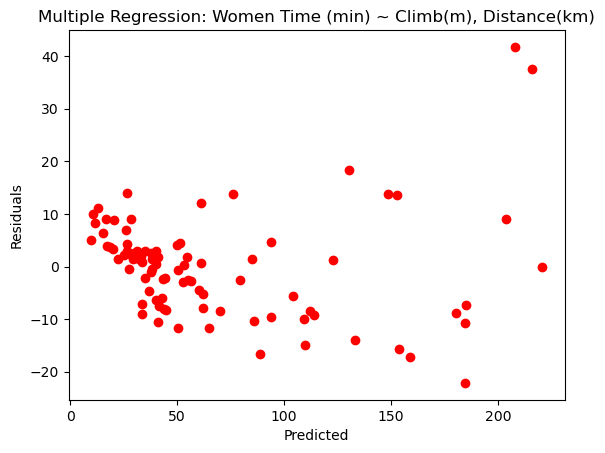

In [14]:
plt.figure()
plt.scatter(y_hat, residues, color='r');
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Multiple Regression: Women Time (min) ~ Climb(m), Distance(km)');

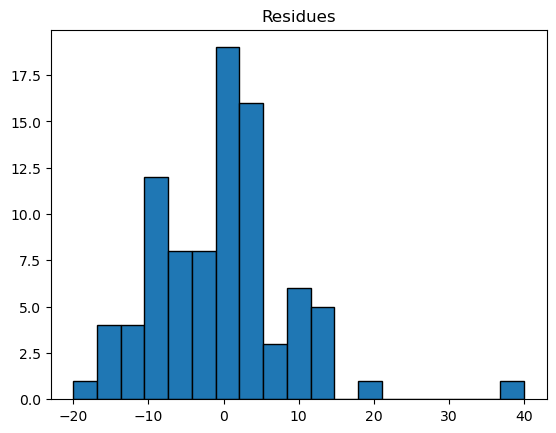

In [15]:
plt.hist(residues, bins=np.linspace(-20, 40, 20), edgecolor='k')
plt.title("Residues");

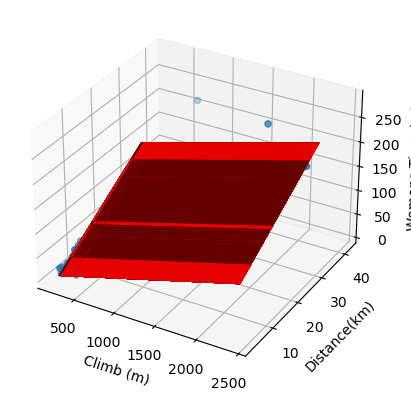

In [16]:
x1 = np.array(scottish_hill_races['Climb (m)'])
x2 = np.array(scottish_hill_races['Distance(km)'])
X1, X2 = np.meshgrid(x1, x2)
x1_bar = x1.mean()
x2_bar = x2.mean()
y_bar = y.mean()
fitted = linmod.coef_[0] * (X1-x1_bar) + linmod.coef_[1] * (X2 - x2_bar) + y_bar
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, np.array(y));
ax.plot_surface(X1, X2, fitted, color='r');
ax.set_xlabel('Climb (m)')
ax.set_ylabel('Distance(km)')
ax.set_zlabel('Womens Time (min)');

**b) Discuss the residuals and what they say about the assumptions and conditions for this regression.**

**Answer:** the residual pattern is not clear and the residual plot is thickening. There is bend in the residual plot and that may indicates that the data are not straight. The residual plot is not equally spread. Some residuals seem unusually large and may deserve attention. The historam of the residues is unimodel, but is is not symmetric and with obvious outliers.

**Problem 29. Scottish hill races, men and women The Scottish hill races considered in Exercise 14 are run by both men and women. We can combine the data to fit a single model for both. Here is one such model. The variable Dist*Sex is the product of the variable Distance and the indicator variable Sex, which is 0 for women and 1 for men.**

In [17]:
x1 = scottish_hill_races['Distance(km)']
y1 = scottish_hill_races['Womens Time (min)']

In [18]:
x2 = x1
y2 = scottish_hill_races['Mens Time (min)']

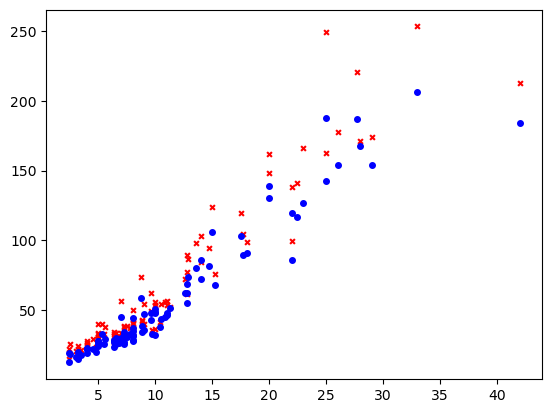

In [19]:
plt.scatter(x1, y1, color='r', marker='x', s=12)
plt.scatter(x2, y2, color='b', marker='o', s=16);

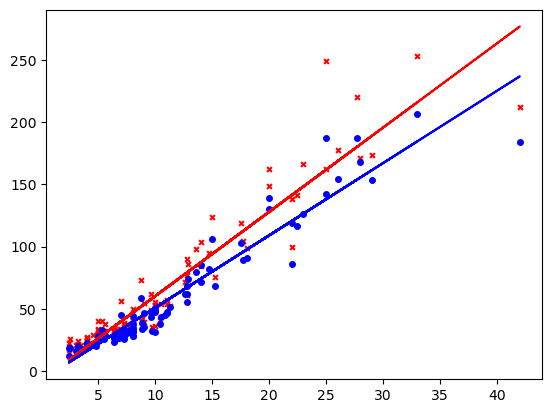

In [20]:
plt.scatter(x1, y1, color='r', marker='x', s=12)
plt.scatter(x2, y2, color='b', marker='o', s=16)
linmod.fit(x1.values.reshape(-1, 1), y1)
plt.plot(x1, linmod.predict(x1.values.reshape(-1, 1)), color='r')
linmod.fit(x2.values.reshape(-1, 1), y2)
plt.plot(x2, linmod.predict(x2.values.reshape(-1, 1)), color='b');

**a) What is the purpose of including the variable Dist*Sex in this model?**

**Answer:** slopes are different in the model because the change in Time with Distance is different for men and women.

**b) What does the coefficient of that variable mean in this model?**

**Answer** with the given amount of Distance, the increasement in the race time is greater for women than for men. 

**Problem 30. Scottish hill races, men and women climbing The Scottish hill races considered in Exercises 14 and 29 are run by both men and women. We can combine the data to fit a single model for both. Here is one such model. The variable Climb*Sex is the product of the variable Climb and the indicator variable Sex, which is 0 for women and 1 for men.**

In [21]:
X1 = scottish_hill_races['Climb (m)']
Y1 = scottish_hill_races['Womens Time (min)']

In [22]:
X2 = X1
Y2 = scottish_hill_races['Mens Time (min)']

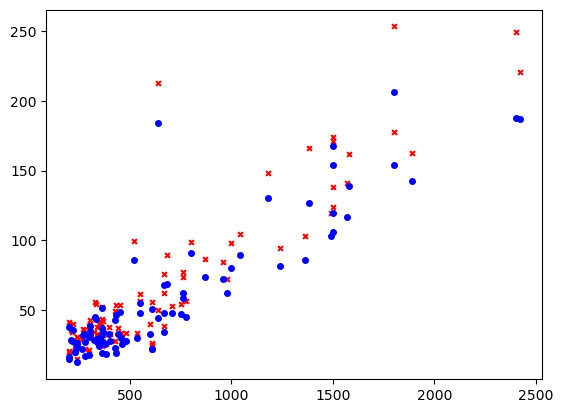

In [23]:
plt.scatter(X1, Y1, color='r', marker='x', s=12)
plt.scatter(X2, Y2, color='b', marker='o', s=16);

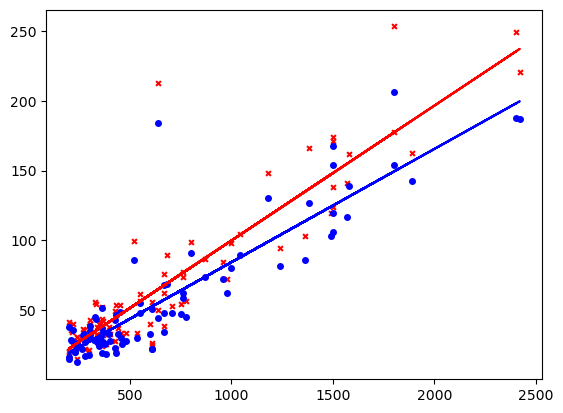

In [24]:
plt.scatter(X1, Y1, color='r', marker='x', s=12)
plt.scatter(X2, Y2, color='b', marker='o', s=16)
linmod.fit(X1.values.reshape(-1, 1), Y1)
plt.plot(X1, linmod.predict(X1.values.reshape(-1, 1)), color='r')
linmod.fit(X2.values.reshape(-1, 1), Y2)
plt.plot(X2, linmod.predict(X2.values.reshape(-1, 1)), color='b');

**a) What is the purpose of including the variable Climb*Sex in this model?**

**Answer:** slopes are different in the model because the change in Time with Climb is different for men and women.

**b) What does the coefficient of that variable mean in this model?**

**Answer:** with the given amount of Climb, the increasement in the race time is greater for women than for men. 